# Stock Portfolio visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random
import yfinance as yf

In [2]:
stocks = [
    "AAPL",
    "META",
    "TSLA",
    "ABBV",
    "ASML",
    "NVDA",
    "CCL",
    "BABA",
    "NSRGY",
    "OMV.VI",
    "VYGVQ",
]
amounts = [20, 15, 20, 10, 30, 40, 20, 50, 60, 30, 50]

start_date = "2013-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

In [3]:
df = pd.DataFrame()

# Store the adjsuted close price of the sotcks in the dataframe
for stock in stocks:
    df[stock] = yf.download(stock, start=start_date, end=end_date)["Adj Close"]
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,META,TSLA,ABBV,ASML,NVDA,CCL,BABA,NSRGY,OMV.VI,VYGVQ
Date,,,,,,,,,,,
2013-01-02,16.769096,28.000000,2.357333,22.419832,59.790607,2.935978,30.327814,NaN,50.015766,16.328138,NaN
2013-01-03,16.557430,27.770000,2.318000,22.234707,58.537140,2.938287,29.947702,NaN,49.354202,16.559763,NaN
2013-01-04,16.096231,28.760000,2.293333,21.953819,57.937271,3.035229,29.971968,NaN,49.760166,16.659451,NaN
2013-01-07,16.001541,29.420000,2.289333,21.998503,56.997169,2.947520,29.874910,NaN,49.624851,16.867619,NaN
2013-01-08,16.044605,29.059999,2.245333,21.519722,56.531593,2.882890,29.923431,NaN,49.196331,17.005423,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,184.250000,344.470001,238.449997,160.460007,703.369995,475.690002,16.350000,76.589996,116.580002,39.849998,0.0010
2024-01-04,181.910004,347.119995,237.929993,161.460007,700.289978,479.980011,16.850000,74.660004,116.160004,40.080002,0.0010
2024-01-05,181.179993,351.950012,237.490005,162.139999,703.340027,490.970001,17.330000,73.010002,115.800003,40.400002,0.0010


In [4]:
for stock in df.columns:
    print(df[stock].mean())

70.64503018634304
165.54435474613027
86.47369450635848
74.4254947991017
282.7024005073047
92.43086802993821
34.66268551461372
139.39811321815603
84.15687573274091
29.480066380918824
2.0366778175295024


In [5]:
df_long = df.reset_index().melt(id_vars=["Date"], var_name="Ticker", value_name="Price")
df_long

,Date,Ticker,Price
0,2013-01-02,AAPL,16.769096
1,2013-01-03,AAPL,16.557430
2,2013-01-04,AAPL,16.096231
3,2013-01-07,AAPL,16.001541
4,2013-01-08,AAPL,16.044605
...,...,...,...
30509,2024-01-03,VYGVQ,0.001000
30510,2024-01-04,VYGVQ,0.001000
30511,2024-01-05,VYGVQ,0.001000
30512,2024-01-08,VYGVQ,0.000300


In [6]:
# Calculate the mean price for each ticker
df_average_prices = df_long.groupby("Ticker")["Price"].mean().reset_index()
df_average_prices.rename(columns={"Price": "Average Price"}, inplace=True)
df_average_prices

,Ticker,Average Price
0,AAPL,70.645030
1,ABBV,74.425495
2,ASML,282.702401
3,BABA,139.398113
4,CCL,34.662686
5,META,165.544355
6,NSRGY,84.156876
7,NVDA,92.430868
8,OMV.VI,29.480066
9,TSLA,86.473695


In [7]:
df_average_prices["Amount"] = amounts
df_average_prices

,Ticker,Average Price,Amount
0,AAPL,70.645030,20
1,ABBV,74.425495,15
2,ASML,282.702401,20
3,BABA,139.398113,10
4,CCL,34.662686,30
5,META,165.544355,40
6,NSRGY,84.156876,20
7,NVDA,92.430868,50
8,OMV.VI,29.480066,60
9,TSLA,86.473695,30


In [8]:
# Get total invested amount of money in the portfolio
portfolio_total_amount = sum(
    df_average_prices["Amount"] * df_average_prices["Average Price"]
)
portfolio_total_amount = round(portfolio_total_amount, 2)
portfolio_total_amount

28008.5

In [9]:
# Visually show the portfolio and some additional information
stock_tickers = df_average_prices["Ticker"].values
sizes = df_average_prices["Amount"] * df_average_prices["Average Price"]

list_of_zeros = [0] * df_average_prices.shape[0]
n = random.randint(0, df_average_prices.shape[0] - 1)
list_of_zeros[n] = 0.1
explode = list_of_zeros

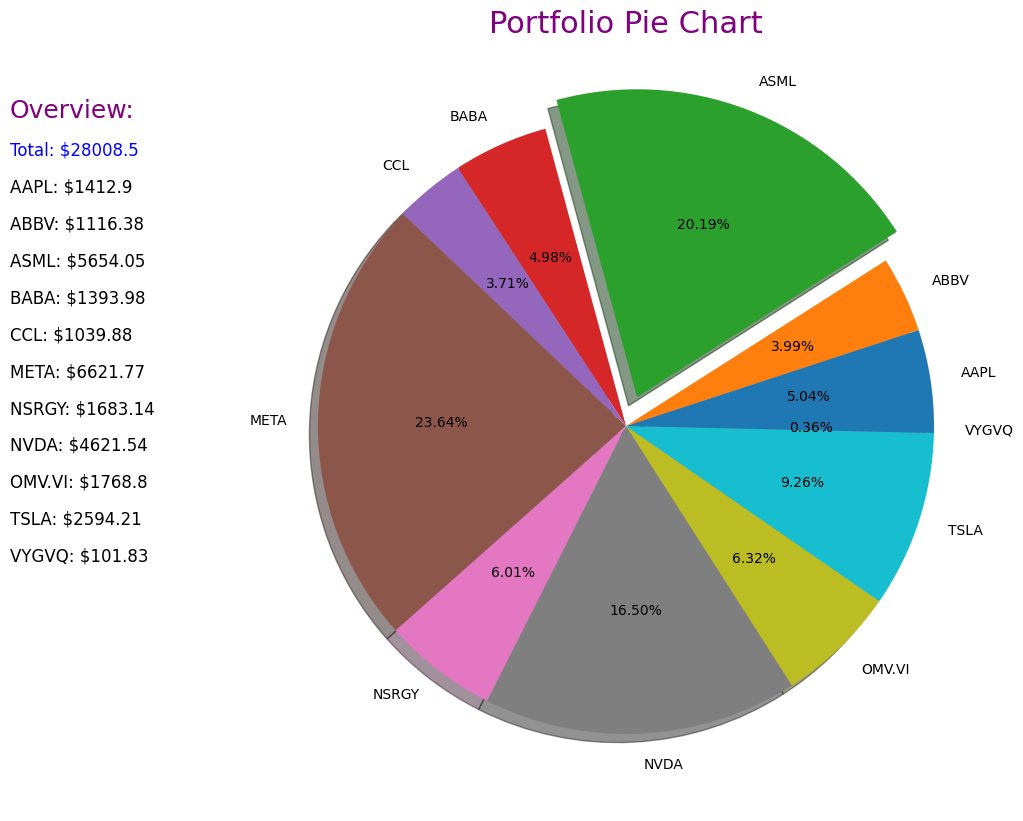

In [10]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(
    sizes,
    explode=explode,
    labels=stock_tickers,
    autopct="%.2f%%",
    shadow="True",
    startangle=360,
)
ax1.set_title("Portfolio Pie Chart", color="Purple", fontsize=22)

x = -2
y = 1
ax1.text(
    x,
    y,
    "Overview:",
    fontsize=18,
    color="Purple",
)
y_counter = 0.12
ax1.text(
    x, y - y_counter, f"Total: ${portfolio_total_amount}", fontsize=12, color="Blue"
)
for i in range(0, df_average_prices.shape[0]):
    ax1.text(
        x,
        0.88 - y_counter,
        f"{df_average_prices['Ticker'][i]}: ${round(df_average_prices['Amount'][i] * df_average_prices['Average Price'][i], 2)}",
        fontsize=12,
        color="Black",
    )
    y_counter += 0.12

fig1.savefig(
    "figures/stock_portfolio_visualization_pie_chart.png", dpi=600
)  # Save as a PNG file with high resolution